In [80]:
import pandas as pd
import numpy as np

In [81]:
#concaterate data

years = range(2015, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path ='yob%d.txt' %year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index = True)

In [82]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130754 entries, 0 to 130753
Data columns (total 4 columns):
name      130754 non-null object
sex       130754 non-null object
births    130754 non-null int64
year      130754 non-null int64
dtypes: int64(2), object(2)
memory usage: 4.0+ MB


In [83]:
names.head()

,name,sex,births,year
0,Emma,F,20455,2015
1,Olivia,F,19691,2015
2,Sophia,F,17417,2015
3,Ava,F,16378,2015
4,Isabella,F,15617,2015


In [84]:
# sum of births by sex
names.groupby('sex').births.sum()

sex
F    6952764
M    7446351
Name: births, dtype: int64

In [85]:
# aggregate data at year and sex level

total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
total_births

sex,F,M
year,,
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837
2018,1686961,1800392


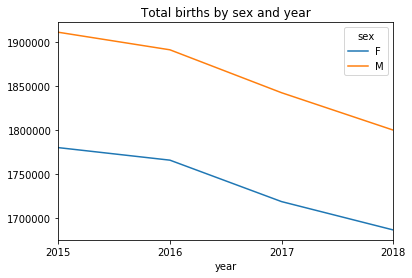

In [86]:
total_births.plot(title="Total births by sex and year", xticks =[2015, 2016, 2017, 2018])

In [87]:
# insert a column prop with the fraction of babies given 
# each name relative to the total number of births

def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births/births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Emma,F,20455,2015,0.011489
1,Olivia,F,19691,2015,0.011060
2,Sophia,F,17417,2015,0.009782
3,Ava,F,16378,2015,0.009199
4,Isabella,F,15617,2015,0.008771


In [88]:
# use np.allclose to check that the group sums are sufficiently
# close to 1

np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [95]:
# extract top 1000 names for each sex/year combination

def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'], as_index=False)
top1000 = grouped.apply(get_top1000)
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8000 entries, (0, 0) to (7, 117749)
Data columns (total 5 columns):
name      8000 non-null object
sex       8000 non-null object
births    8000 non-null int64
year      8000 non-null int64
prop      8000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 398.5+ KB


In [90]:
# split names into boys and girls

boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']
boys.head()

name sex  births  year      prop
year sex                                           
2015 M   19091     Noah   M   19635  2015  0.010272
         19092     Liam   M   18374  2015  0.009612
         19093    Mason   M   16627  2015  0.008698
         19094    Jacob   M   15949  2015  0.008344
         19095  William   M   15909  2015  0.008323

In [102]:

total_births = top1000.pivot_table('prop', index='year', columns='name',
                                  aggfunc=sum)
total_births

name,Aaden,Aadhya,Aaliyah,Aarav,Aaron,Aarush,Abby,Abdiel,Abdullah,Abel,...,Zev,Zhavia,Zion,Zoe,Zoey,Zoie,Zola,Zora,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
2015,0.000155,NaN,0.002731,0.000282,0.003745,0.00011,0.000408,0.000133,0.000207,0.001694,...,NaN,NaN,0.001054,0.003393,0.003900,0.000208,NaN,NaN,0.000401,NaN
2016,NaN,0.000161,0.002628,0.000274,0.003784,NaN,0.000411,0.000174,0.000215,0.001602,...,NaN,NaN,0.001139,0.003252,0.003648,0.000177,NaN,NaN,0.000503,0.000131
2017,0.000131,0.000169,0.002428,0.000285,0.003905,NaN,0.000405,0.000204,0.000180,0.001465,...,NaN,NaN,0.001235,0.003000,0.003516,0.000188,NaN,NaN,0.000494,0.000163
2018,NaN,NaN,0.002259,0.000271,0.003307,NaN,0.000387,0.000244,0.000194,0.001479,...,0.000117,0.000181,0.001196,0.003001,0.003497,0.000190,0.000163,0.000159,0.000665,0.000179


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aa051e320>,
      dtype=object)

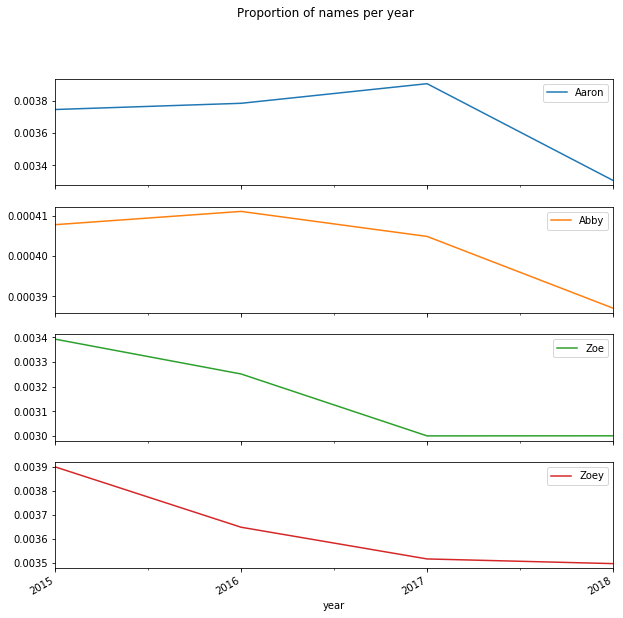

In [104]:
subset = total_births[['Aaron', 'Abby', 'Zoe', 'Zoey']]
subset.plot(subplots=True,figsize=(10, 10), grid =False,
           title="Proportion of names per year", xticks=[2015, 2016, 2017, 2018])

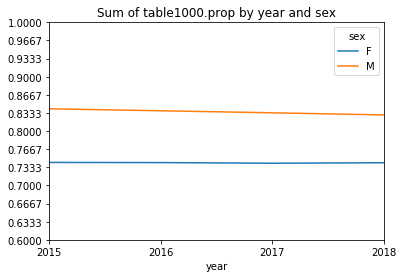

In [112]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0.6, 1, 13), xticks=range(2015, 2019))

As shown on the graph above usage of popular names is slightly decreasing from 2015 to 2018.

In [117]:
df = boys[boys.year==2015]
prop_cumsum= df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

134

In [118]:
df = boys[boys.year==2016]
prop_cumsum= df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

138

In [119]:
df = boys[boys.year==2017]
prop_cumsum= df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

142

In [120]:
df = boys[boys.year==2018]
prop_cumsum= df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

148

The previous 4 outputs also show that the proportion of popular names is decreasing from 2017 to 2018.

Data Source: https://www.ssa.gov/oact/babynames/limits.html